In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from xgboost import XGBRegressor
from scipy.stats import skew
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
data = fetch_california_housing()

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [18]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X.shape

(20640, 8)

In [21]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0, 0.5, 'Frequency')

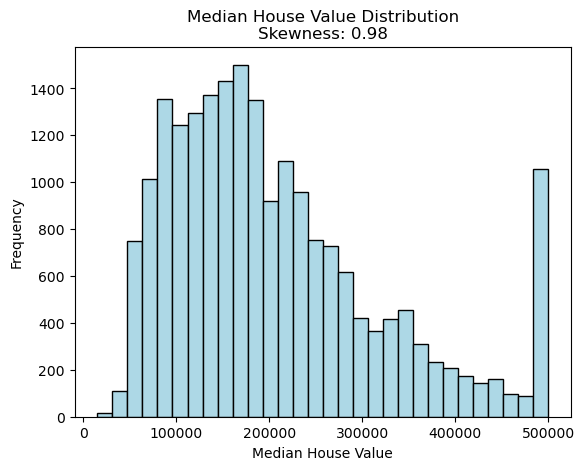

In [29]:
plt.hist(1e5*y, bins=30,  color='lightblue', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

In [37]:
# base estimators, or individual trees
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [43]:
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

start_time_rf = time.time() 
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf


start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)


print(f"Random Forest:\nTrain Time: {rf_train_time}\nPrediction Time: {rf_pred_time}\n\
MSE: {mse_rf}\nMAE: {mae_rf:.4f}\nRSquared: {r2_rf}\n\nXGBoost:\nTrain Time: {xgb_train_time}\nPrediction Time: {xgb_pred_time}\n\
MSE: {mse_xgb}\nMAE: {mae_xgb}\nRSquared: {r2_xgb}")

Random Forest:
Train Time: 20.93104314804077
Prediction Time: 0.154097318649292
MSE: 0.2553684927247781
MAE: 0.3275
RSquared: 0.8051230593157366

XGBoost:
Train Time: 0.3296666145324707
Prediction Time: 0.01783919334411621
MSE: 0.2225899267544737
MAE: 0.30957335413783094
RSquared: 0.8301370561019205


In [55]:
std_y = np.std(y_test)

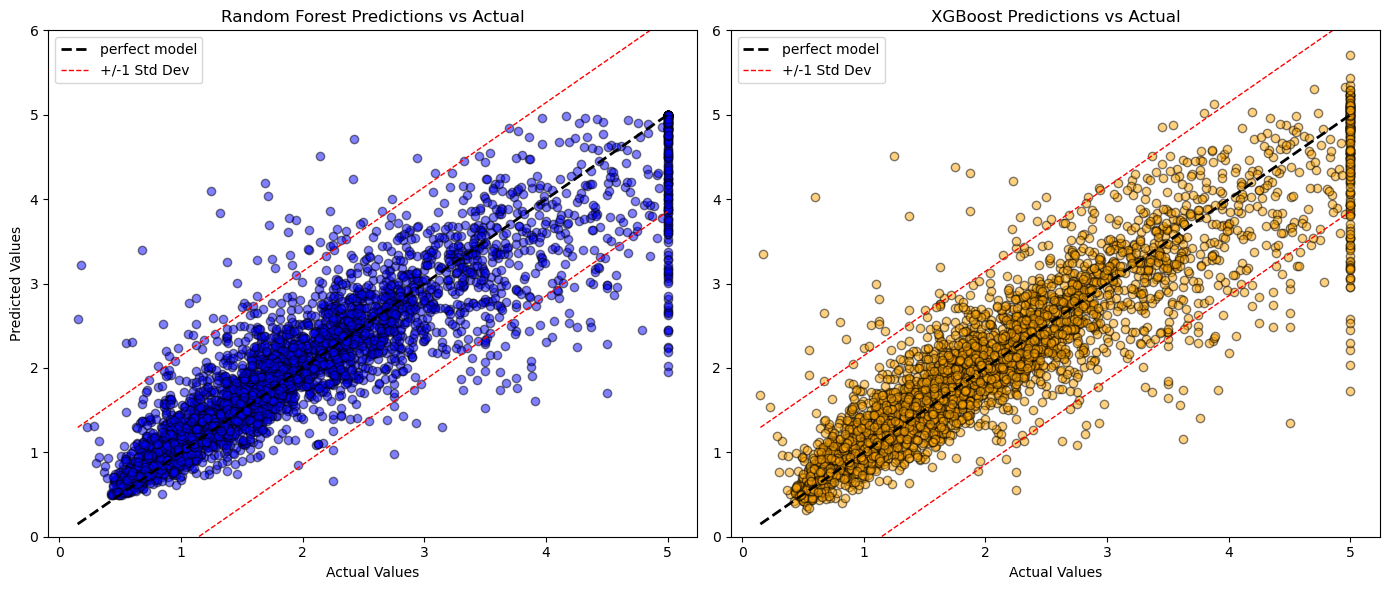

In [67]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

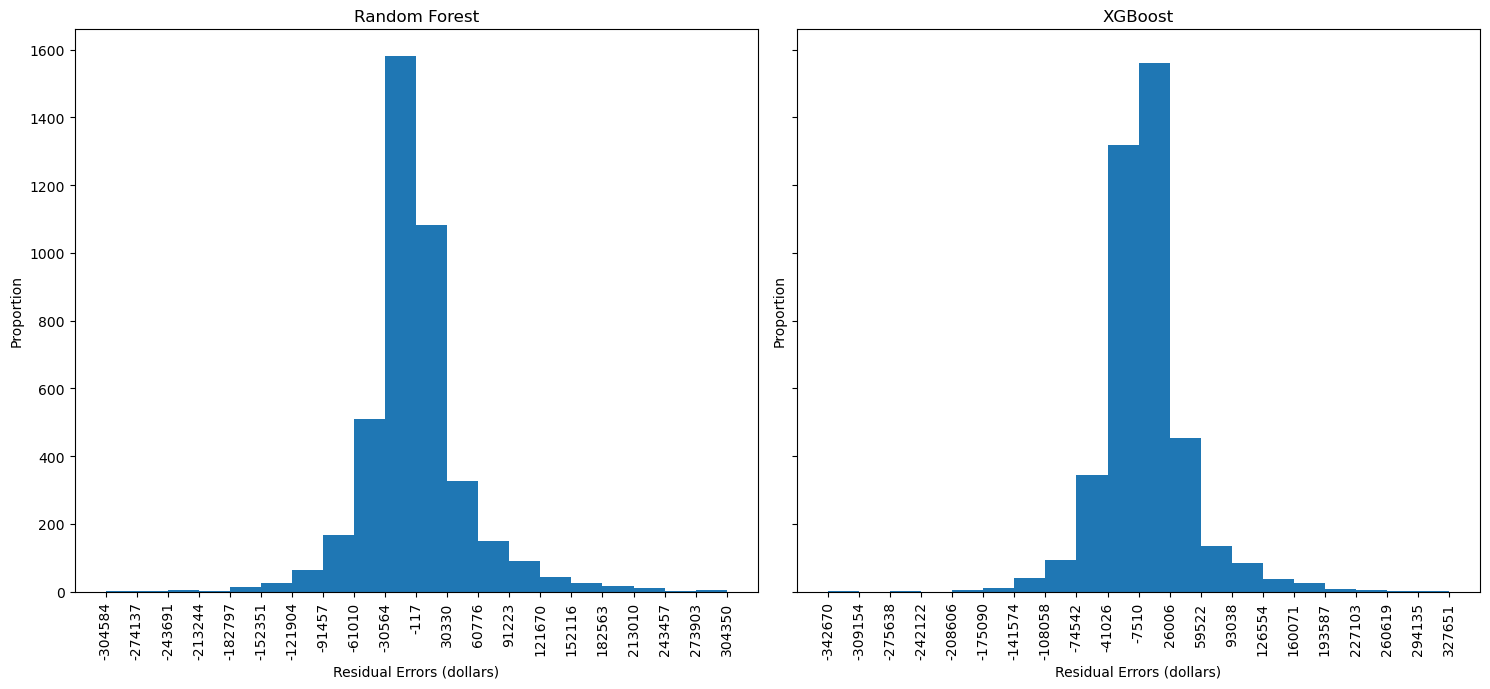

In [161]:
res_rf = 1e5*(y_test-y_pred_rf)
res_xgb = 1e5*(y_test-y_pred_xgb)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15, 7))

n, bins, patches = axs[0].hist(res_rf, bins=20)
axs[0].set_title("Random Forest")
axs[0].set_xlabel("Residual Errors (dollars)")
axs[0].set_ylabel("Proportion")
axs[0].set_xticks(ticks=bins, labels=bins.round(0).astype("int64"), rotation=90)

n, bins, patches = axs[1].hist(res_xgb, bins=20)
axs[1].set_title("XGBoost")
axs[1].set_xlabel("Residual Errors (dollars)")
axs[1].set_ylabel("Proportion")
axs[1].set_xticks(ticks=bins, labels=bins.round(0).astype("int64"), rotation=90)

plt.show()

In [201]:
print(axs)

[<Axes: > <Axes: >]


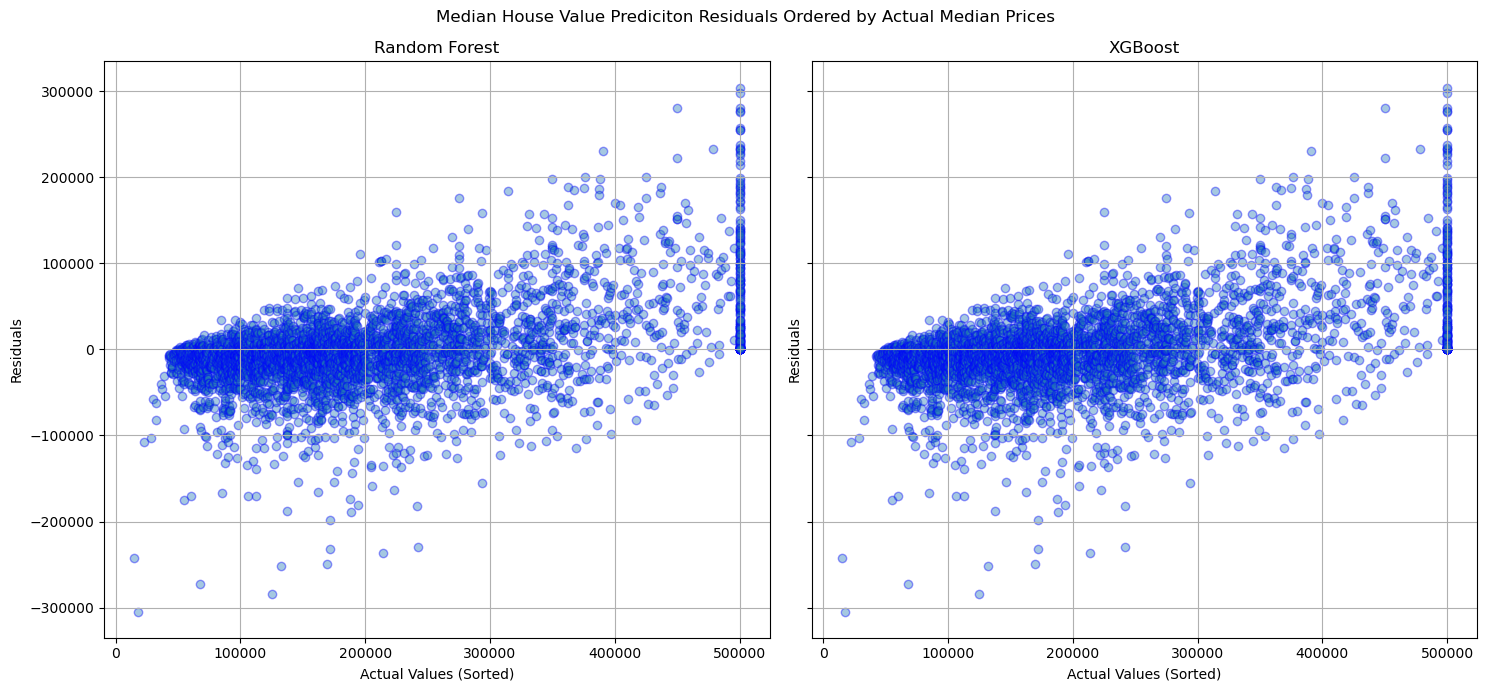

In [209]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15, 7))
fig.suptitle("Median House Value Prediciton Residuals Ordered by Actual Median Prices")

residuals_df_rf = pd.DataFrame({'Actual': 1e5*y_test, 'Residuals': res_rf})
residuals_df_rf = residuals_df_rf.sort_values(by='Actual')

axs[0].scatter(residuals_df_rf['Actual'], residuals_df_rf['Residuals'] , marker='o', alpha=0.4, ec='b')
axs[0].set_title('Random Forest')
axs[0].set_xlabel('Actual Values (Sorted)')
axs[0].set_ylabel('Residuals')
axs[0].grid(True)


residuals_df_xgb = pd.DataFrame({'Actual': 1e5*y_test, 'Residuals': res_xgb})
residuals_df = residuals_df.sort_values(by='Actual')

axs[1].scatter(residuals_df['Actual'], residuals_df['Residuals'] , marker='o', alpha=0.4, ec='b')
axs[1].set_title('XGBoost')
axs[1].set_xlabel('Actual Values (Sorted)')
axs[1].set_ylabel('Residuals')
axs[1].grid(True)
plt.tight_layout()
plt.show()

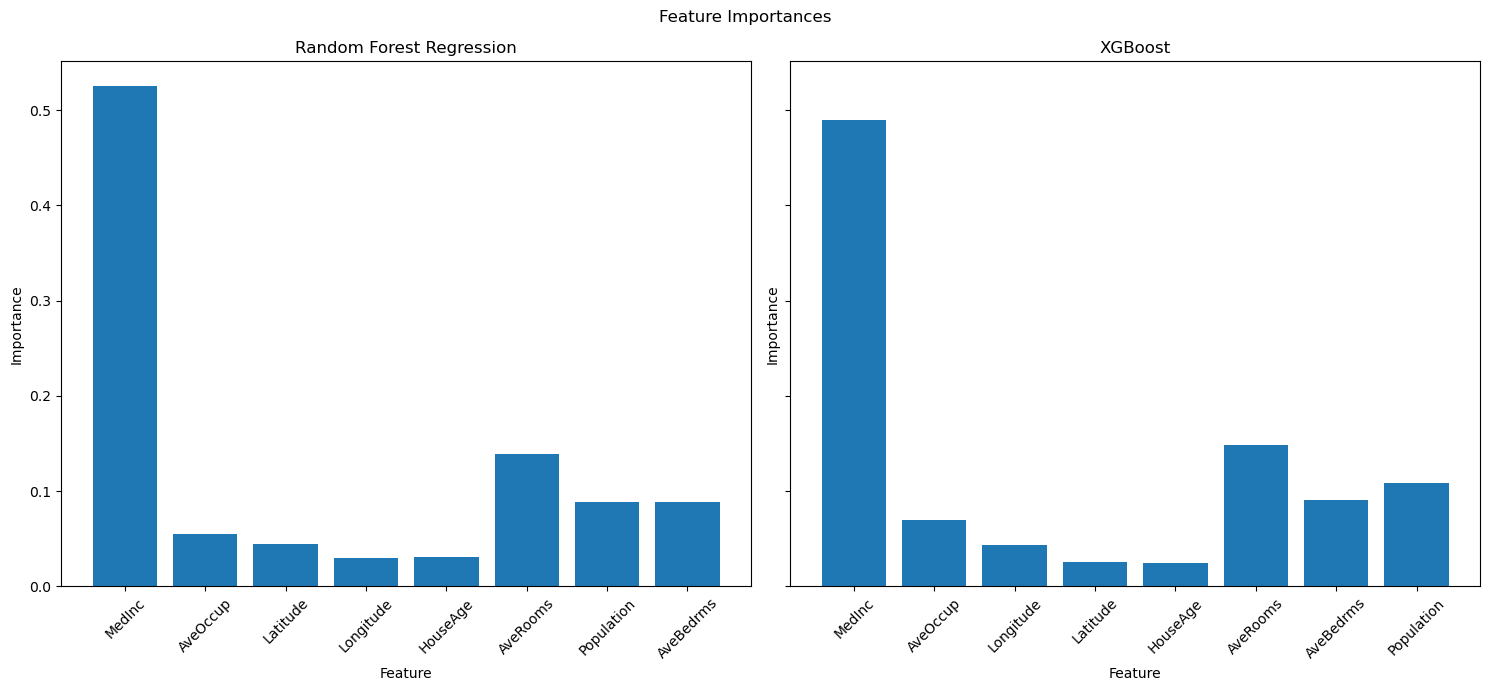

In [243]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15, 7))
fig.suptitle("Feature Importances")

importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
features = data.feature_names

axs[0].bar(range(X.shape[1]), importances_rf,  align="center")
axs[0].set_xticks(range(X.shape[1]), [features[i] for i in indices_rf], rotation=45)
axs[0].set_xlabel("Feature")
axs[0].set_ylabel("Importance")
axs[0].set_title("Random Forest Regression")

axs[1].bar(range(X.shape[1]), importances_xgb,  align="center")
axs[1].set_xticks(range(X.shape[1]), [features[i] for i in indices_xgb], rotation=45)
axs[1].set_xlabel("Feature")
axs[1].set_ylabel("Importance")
axs[1].set_title("XGBoost")
plt.show()